# Notebook Summary


1.   Library importing
2.   Uploading the database to a Pandas dataframe
3.   Training Method of the Adaline Class
4.   Showing that the Problem is suitable for a Linear Classifier
5.   Plotting the Mean Square Error updates
6.   Plotting the Hyperplan Function separating the classes



# The Adaline Algorithm Class

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

> parsing the IRIS database to a Pandas Dataframe

In [ ]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8') # Dataframe

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# The Adaline Class

> Structurally, the adaline class is identical as the Perceptron, considering the same parameters. The main difference between them is the learning rule, which we tackle a few snippets below.

In [ ]:
class Adaline (object):
  # Design Pattern indications for ML class
  """ Adaline classifier

  Parameters
  -------------
  eta: float
    Learning rate (between 0. to 1.)
  n_epochs: int
    Number of epochs
  random_state: int
    Number for randomic weight generation
  
  Attributes
  --------------
  errors_: list
    Number of misclassifications in each iteration
  w_: {array-like}
    Weights after model fitting
  b_: {array-like}
    Bias after model fitting

  """
  #constructor of the Perceptron class
  
  def __init__(self, eta = 0.1, n_epochs = 100, random_state = 5):
    self.eta = eta*0.001
    self.n_epochs = n_epochs
    self.random_state = random_state
    
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1] + 1)
    self.cost = []
  
  #Adaline Learning Rules
    for i in range(0, self.n_epochs):
      errors = 0
      z = np.dot(X, self.w_[1:]) + self.w_[0]
      errors_ =  y - z
      self.w_[1:] += self.eta * np.dot(X.transpose(), errors_)
      self.w_[0] += self.eta* sum(errors_)
      errors = sum(errors_ ** 2)  #implementing the mean quadratic error
      self.cost.append(errors)
    return self   

# Plotting the Data


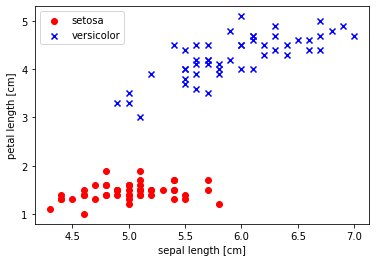

In [ ]:
# plot data

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values


plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
x1 = np.linspace(X[:,0].min(), X[:,0].max())

ppn = Adaline(eta = 0.1, n_epochs=100, random_state=5)

ppn.fit(X,y)

x1 = np.linspace(X[:,0].min(), X[:,0].max())

#x2 = (-w[0]*x1 - b)/w[1]

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

# Observations regarding the plot above


> As we can see, the IRIS database can be classified by a Linear Classifier. We applied the scatterplot method from the matplotlib library to show the spatial
distribution of the data



# Code snippet below


> This code snippet below applies the Perceptron class to the given parameters: epochs, random state, neurons. 
> The parameters are explained by the design pattern snippet on the Perceptron class description
> The matplotlib plot show how many iterations the perceptron takes to converge based on the IRIS database and the given parameters


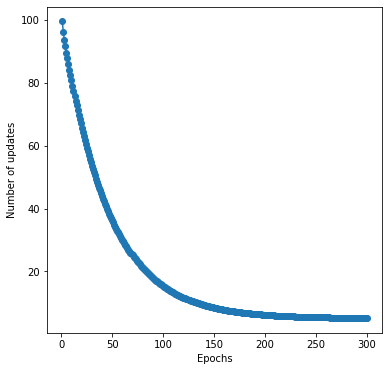

In [ ]:

#evokes the Adaline class parsing the following parameters
ppn = Adaline(eta=0.1, n_epochs=300, random_state=14)
#run the fit method from the adaline class

ppn.fit(X, y)

plt.plot(range(1, len(ppn.cost) + 1), ppn.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
# plt.savefig('images/02_07.png', dpi=300)
plt.rcParams["figure.figsize"] = [6,6]
plt.show()

> The plot above shows the Mean Square Error update per iteration

#Showing the Hyperplan separating the both classes

> 

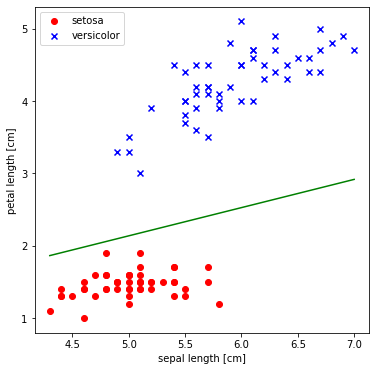

In [ ]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
x1 = np.linspace(X[:,0].min(), X[:,0].max())

ppn = Adaline(eta = 0.001, n_epochs=3000, random_state=2)

ppn.fit(X,y)

x1 = np.linspace(X[:,0].min(), X[:,0].max())

#x2 = (-w[0]*x1 - b)/w[1]

x2 = (-ppn.w_[1]*x1 - ppn.w_[0])/ppn.w_[2]

plt.plot(x1, x2, color='green')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()